In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../CDSAML/BBC_News_Train.csv')

In [3]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
df=df.dropna()

In [7]:
X=df.drop(['ArticleId','Category'],axis=1)

In [9]:
X

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
...,...
1485,double eviction from big brother model caprice...
1486,dj double act revamp chart show dj duo jk and ...
1487,weak dollar hits reuters revenues at media gro...
1488,apple ipod family expands market apple has exp...


In [11]:
y=df['Category']

In [13]:
y

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [16]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhinav
[nltk_data]     Gunti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
messages=X.copy()
messages.reset_index(inplace=True)
messages

,index,Text
0,0,worldcom ex-boss launches defence lawyers defe...
1,1,german business confidence slides german busin...
2,2,bbc poll indicates economic gloom citizens in ...
3,3,lifestyle governs mobile choice faster bett...
4,4,enron bosses in $168m payout eighteen former e...
...,...,...
1485,1485,double eviction from big brother model caprice...
1486,1486,dj double act revamp chart show dj duo jk and ...
1487,1487,weak dollar hits reuters revenues at media gro...
1488,1488,apple ipod family expands market apple has exp...


In [18]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i]) #replacing all charecters apart from A-Z,a-z with ' '
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
corpus

['worldcom ex boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom ex head intern account alert director irregular account practic us telecom giant warn led collaps firm follow discoveri bn bn account fraud mr ebber plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problem ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book howev ms cooper said mr sullivan mention anyth uncom

In [20]:
import gowpy

In [24]:
from gowpy.gow.builder import GoWBuilder
builder = GoWBuilder(directed=True, window_size=4)
gow = builder.compute_gow_from_document(corpus[0])

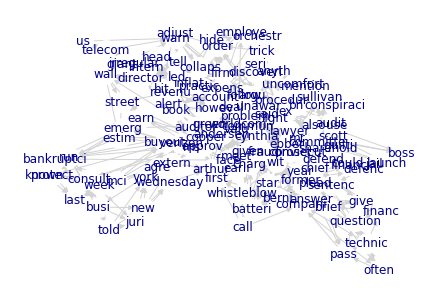

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

g = gow.to_labeled_graph()

options = {
    "font_weight" : 'normal',
    "font_color" : 'darkblue',
    #
    "edge_color" : 'lightgray',
    #
    "node_size" : 400,
    "node_color": 'white',
    "with_labels": True,
}
nx.draw(g, **options)